#Section 1

---



In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Activation, Flatten , Dense, MaxPooling2D
from tensorflow.keras.layers import Dropout

from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
from keras.utils import np_utils, to_categorical
from sklearn.model_selection import KFold

In [ ]:
def load_data():
    
    return mnist.load_data()

In [ ]:
def prepare_data(train_images, train_labels, test_images, test_labels):

    x_train = train_images.reshape(60000,28,28,1)

    x_test = test_images.reshape(10000,28,28,1)

    #one hot encoding
    y_train =  to_categorical(train_labels) 
    y_test = to_categorical(test_labels)

    return (x_train, y_train, x_test, y_test )

In [ ]:
def model(x_train, y_train, x_test, y_test ):
    
    kfold = KFold(n_splits=3, shuffle=True)
    fold_no = 0
    history = ''
    
    # Define per-fold score containers
    for train_index, test_index in kfold.split(x_train):
        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold_no} ...')

        model = Sequential()

        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='valid', input_shape=(28,28,1)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='valid'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Flatten())
        model.add(Dense(64, activation='relu'))
        model.add(Dense(10, activation='softmax'))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        history = model.fit(x_train[train_index], y_train[train_index],
                batch_size=2048, epochs=10, verbose=2,
                validation_data=(x_train[test_index], y_train[test_index]))
        
        
        scores = model.evaluate(x_train[test_index], y_train[test_index], verbose=0)
        print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

        fold_no += 1
    
    model.summary()

    score = model.evaluate(x_test, y_test)
    print('Test loss :', score[0])
    print('Test accuracy:', score[1] * 100)

    return history

In [ ]:
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
def main():
    (train_images, train_labels), (test_images, test_labels) = load_data()
   
    x_train, y_train, x_test, y_test = prepare_data(train_images, train_labels, test_images, test_labels)

    history = model(x_train, y_train, x_test, y_test)
    
    plot(history)

11493376/11490434 [==============================] - 0s 0us/step
------------------------------------------------------------------------
Training for fold 0 ...
Epoch 1/10
20/20 - 9s - loss: 1.1231 - accuracy: 0.6632 - val_loss: 1.7051 - val_accuracy: 0.7250
Epoch 2/10
20/20 - 1s - loss: 0.2246 - accuracy: 0.9323 - val_loss: 1.0008 - val_accuracy: 0.8038
Epoch 3/10
20/20 - 1s - loss: 0.1344 - accuracy: 0.9594 - val_loss: 0.4424 - val_accuracy: 0.8837
Epoch 4/10
20/20 - 1s - loss: 0.0961 - accuracy: 0.9702 - val_loss: 0.2530 - val_accuracy: 0.9259
Epoch 5/10
20/20 - 1s - loss: 0.0751 - accuracy: 0.9773 - val_loss: 0.1413 - val_accuracy: 0.9567
Epoch 6/10
20/20 - 1s - loss: 0.0617 - accuracy: 0.9815 - val_loss: 0.1024 - val_accuracy: 0.9684
Epoch 7/10
20/20 - 1s - loss: 0.0521 - accuracy: 0.9844 - val_loss: 0.0894 - val_accuracy: 0.9719
Epoch 8/10
20/20 - 1s - loss: 0.0445 - accuracy: 0.9867 - val_loss: 0.0764 - val_accuracy: 0.9762
Epoch 9/10
20/20 - 1s - loss: 0.0390 - accuracy: 0.988

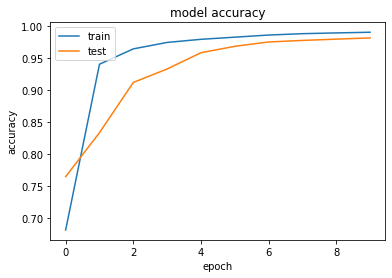

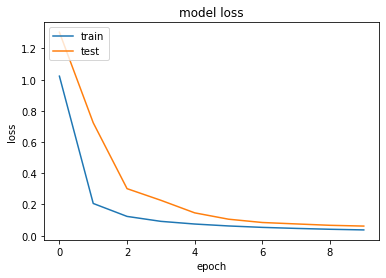

In [ ]:
main()

#noisy

In [ ]:
def show_result(x_test_noisy, test_images):
    n = 10
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(test_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display noisy 
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [ ]:
def add_noise(x_train, x_test, noise_factor_train, noise_factor_test):

    x_train_noisy = x_train + noise_factor_train * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
    x_test_noisy = x_test + noise_factor_test * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

    x_train_noisy = np.clip(x_train_noisy, 0., 1.)
    x_test_noisy = np.clip(x_test_noisy, 0., 1.)

    return x_train_noisy, x_test_noisy

In [ ]:
def main_noisy(noise_factor_train = 0.4, noise_factor_test = 0.7):

    (train_images, train_labels), (test_images, test_labels) = load_data()

    x_train, y_train, x_test, y_test = prepare_data(train_images, train_labels, test_images, test_labels)
    
    x_train_noisy, x_test_noisy = add_noise(x_train, x_test, noise_factor_train, noise_factor_test)

    history = model(x_train_noisy, y_train, x_test_noisy, y_test)
    
    show_result(x_train_noisy, x_test_noisy)

    plot(history)

------------------------------------------------------------------------
Training for fold 0 ...
Epoch 1/10
20/20 - 1s - loss: 1.5553 - accuracy: 0.4979 - val_loss: 2.0569 - val_accuracy: 0.4635
Epoch 2/10
20/20 - 1s - loss: 0.4869 - accuracy: 0.8468 - val_loss: 1.8993 - val_accuracy: 0.5407
Epoch 3/10
20/20 - 1s - loss: 0.3155 - accuracy: 0.9019 - val_loss: 2.0082 - val_accuracy: 0.2199
Epoch 4/10
20/20 - 1s - loss: 0.2374 - accuracy: 0.9273 - val_loss: 2.1512 - val_accuracy: 0.1331
Epoch 5/10
20/20 - 1s - loss: 0.1908 - accuracy: 0.9418 - val_loss: 2.2683 - val_accuracy: 0.1125
Epoch 6/10
20/20 - 1s - loss: 0.1595 - accuracy: 0.9512 - val_loss: 2.3477 - val_accuracy: 0.1089
Epoch 7/10
20/20 - 1s - loss: 0.1370 - accuracy: 0.9589 - val_loss: 2.3568 - val_accuracy: 0.1160
Epoch 8/10
20/20 - 1s - loss: 0.1191 - accuracy: 0.9640 - val_loss: 2.3487 - val_accuracy: 0.1330
Epoch 9/10
20/20 - 1s - loss: 0.1046 - accuracy: 0.9690 - val_loss: 2.3087 - val_accuracy: 0.1648
Epoch 10/10
20/20 - 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


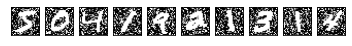

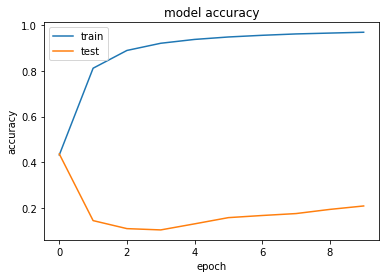

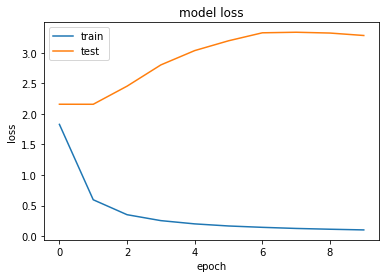

In [ ]:
main_noisy(noise_factor_train = 0.9, noise_factor_test = 0.9)

------------------------------------------------------------------------
Training for fold 0 ...
Epoch 1/10
20/20 - 2s - loss: 1.7678 - accuracy: 0.4516 - val_loss: 2.1585 - val_accuracy: 0.2768
Epoch 2/10
20/20 - 1s - loss: 0.5958 - accuracy: 0.8130 - val_loss: 2.2563 - val_accuracy: 0.1392
Epoch 3/10
20/20 - 1s - loss: 0.3620 - accuracy: 0.8881 - val_loss: 2.6037 - val_accuracy: 0.1529
Epoch 4/10
20/20 - 1s - loss: 0.2705 - accuracy: 0.9174 - val_loss: 2.9424 - val_accuracy: 0.1063
Epoch 5/10
20/20 - 1s - loss: 0.2126 - accuracy: 0.9361 - val_loss: 3.2181 - val_accuracy: 0.1015
Epoch 6/10
20/20 - 1s - loss: 0.1742 - accuracy: 0.9482 - val_loss: 3.4349 - val_accuracy: 0.1011
Epoch 7/10
20/20 - 1s - loss: 0.1464 - accuracy: 0.9567 - val_loss: 3.5563 - val_accuracy: 0.1019
Epoch 8/10
20/20 - 1s - loss: 0.1268 - accuracy: 0.9624 - val_loss: 3.6128 - val_accuracy: 0.1089
Epoch 9/10
20/20 - 1s - loss: 0.1115 - accuracy: 0.9668 - val_loss: 3.6480 - val_accuracy: 0.1127
Epoch 10/10
20/20 - 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


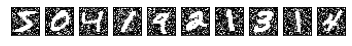

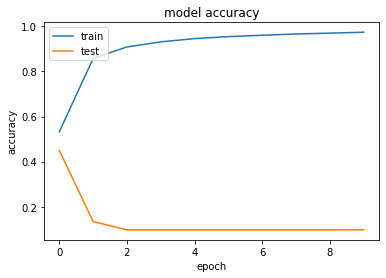

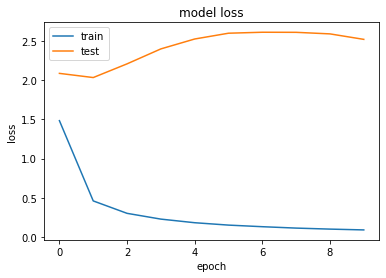

In [ ]:
main_noisy(noise_factor_train = 0.7, noise_factor_test = 0.7)

------------------------------------------------------------------------
Training for fold 0 ...
Epoch 1/10
20/20 - 1s - loss: 1.2154 - accuracy: 0.6241 - val_loss: 2.0036 - val_accuracy: 0.7078
Epoch 2/10
20/20 - 1s - loss: 0.3103 - accuracy: 0.9058 - val_loss: 1.8534 - val_accuracy: 0.6707
Epoch 3/10
20/20 - 1s - loss: 0.1882 - accuracy: 0.9436 - val_loss: 1.9106 - val_accuracy: 0.3862
Epoch 4/10
20/20 - 1s - loss: 0.1388 - accuracy: 0.9585 - val_loss: 1.9622 - val_accuracy: 0.2686
Epoch 5/10
20/20 - 1s - loss: 0.1102 - accuracy: 0.9677 - val_loss: 2.0010 - val_accuracy: 0.2350
Epoch 6/10
20/20 - 1s - loss: 0.0923 - accuracy: 0.9729 - val_loss: 2.0050 - val_accuracy: 0.2542
Epoch 7/10
20/20 - 1s - loss: 0.0789 - accuracy: 0.9772 - val_loss: 1.9937 - val_accuracy: 0.2901
Epoch 8/10
20/20 - 1s - loss: 0.0693 - accuracy: 0.9801 - val_loss: 1.9171 - val_accuracy: 0.3379
Epoch 9/10
20/20 - 1s - loss: 0.0616 - accuracy: 0.9822 - val_loss: 1.8638 - val_accuracy: 0.3697
Epoch 10/10
20/20 - 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


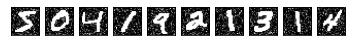

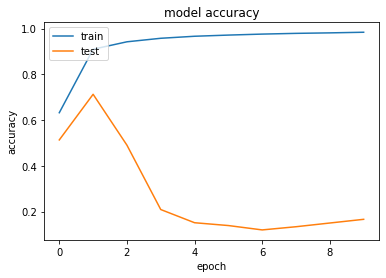

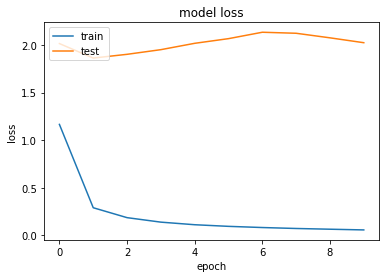

In [ ]:
main_noisy(noise_factor_train = 0.3, noise_factor_test = 0.3)

------------------------------------------------------------------------
Training for fold 0 ...
Epoch 1/10
20/20 - 1s - loss: 1.4523 - accuracy: 0.5458 - val_loss: 2.0393 - val_accuracy: 0.6548
Epoch 2/10
20/20 - 1s - loss: 0.3958 - accuracy: 0.8781 - val_loss: 2.0794 - val_accuracy: 0.2940
Epoch 3/10
20/20 - 1s - loss: 0.2418 - accuracy: 0.9269 - val_loss: 2.3909 - val_accuracy: 0.1657
Epoch 4/10
20/20 - 1s - loss: 0.1795 - accuracy: 0.9471 - val_loss: 2.7999 - val_accuracy: 0.1160
Epoch 5/10
20/20 - 1s - loss: 0.1424 - accuracy: 0.9582 - val_loss: 3.1173 - val_accuracy: 0.1073
Epoch 6/10
20/20 - 1s - loss: 0.1187 - accuracy: 0.9650 - val_loss: 3.3434 - val_accuracy: 0.1059
Epoch 7/10
20/20 - 1s - loss: 0.1013 - accuracy: 0.9702 - val_loss: 3.4955 - val_accuracy: 0.1041
Epoch 8/10
20/20 - 1s - loss: 0.0889 - accuracy: 0.9737 - val_loss: 3.5007 - val_accuracy: 0.1047
Epoch 9/10
20/20 - 1s - loss: 0.0786 - accuracy: 0.9775 - val_loss: 3.4629 - val_accuracy: 0.1054
Epoch 10/10
20/20 - 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


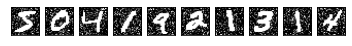

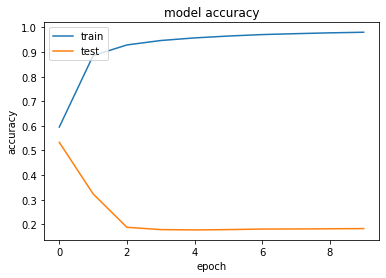

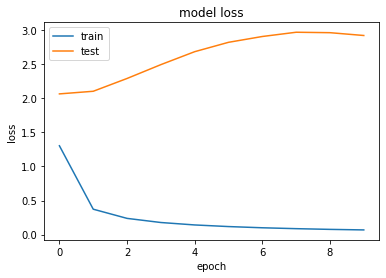

In [ ]:
main_noisy(noise_factor_train = 0.4, noise_factor_test = 0.7)

------------------------------------------------------------------------
Training for fold 0 ...
Epoch 1/10
20/20 - 2s - loss: 1.5988 - accuracy: 0.5011 - val_loss: 2.0868 - val_accuracy: 0.4678
Epoch 2/10
20/20 - 1s - loss: 0.5016 - accuracy: 0.8424 - val_loss: 1.9849 - val_accuracy: 0.4218
Epoch 3/10
20/20 - 1s - loss: 0.3324 - accuracy: 0.8963 - val_loss: 2.1510 - val_accuracy: 0.2359
Epoch 4/10
20/20 - 1s - loss: 0.2550 - accuracy: 0.9219 - val_loss: 2.3627 - val_accuracy: 0.2160
Epoch 5/10
20/20 - 1s - loss: 0.2053 - accuracy: 0.9384 - val_loss: 2.5281 - val_accuracy: 0.2060
Epoch 6/10
20/20 - 1s - loss: 0.1708 - accuracy: 0.9494 - val_loss: 2.6209 - val_accuracy: 0.2028
Epoch 7/10
20/20 - 1s - loss: 0.1462 - accuracy: 0.9566 - val_loss: 2.6727 - val_accuracy: 0.2035
Epoch 8/10
20/20 - 1s - loss: 0.1289 - accuracy: 0.9613 - val_loss: 2.6743 - val_accuracy: 0.2033
Epoch 9/10
20/20 - 1s - loss: 0.1131 - accuracy: 0.9661 - val_loss: 2.6512 - val_accuracy: 0.2025
Epoch 10/10
20/20 - 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


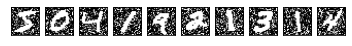

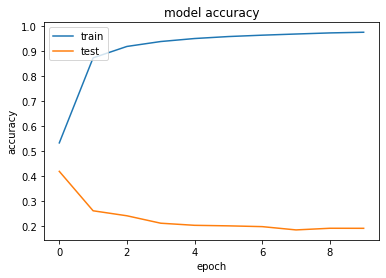

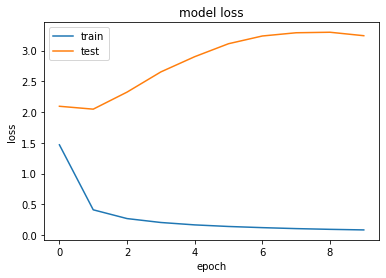

In [ ]:
main_noisy(noise_factor_train = 0.7, noise_factor_test = 0.4)